<a href="https://colab.research.google.com/github/Dotto-Luis/Projects/blob/main/LOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.INSPECCIONAR WEB - VER ESTRUCTURA HTLM**
- ** objetivo: explorar la estructura de la informacion para analizar el proceso de extraccion**

In [298]:
import requests
from bs4 import BeautifulSoup #para parsear el codigo htlm (identificar partes utiles dentro del codigo)
import pandas as pd

In [299]:
url = 'https://dolarhistorico.com/cotizacion-dolar-blue'
usd = requests.get(url)

In [300]:
s = BeautifulSoup(usd.text, 'lxml')

In [301]:
#print(usd.text)
#print(s.prettify)

## 1b. IMPORTAR WEB DE ARCHIVO .HTLM
- ** objetivo: no depender de una conexion a internet**

In [302]:
#from google.colab import drive
#import os
#drive.mount('/content/gdrive')
#print(os.getcwd())
#os.chdir("/content/gdrive/My Drive")

---
# **2.PROCESAR HTML PARA OBTENER EL CODIGO RELEVANTE**
**objetivo: limpiar codigo htlm y obtener los datos relevantes**


Como la url principal tiene el mismo formato que las url secundarias, podemos utilizar el link de la web principal para obtener la info de las web secundarias, para esto se crean listas con anios y meses. Luego generamos las url de los meses faltantes con un ciclo for.

Buscamos ir de lo macro a lo micro. Primero desglosando la web principal y luego desglosando las web con la cotizacion de cada mes.


1. Obtener urls de los meses que contienen las tablas con las cotizaciones
2. Hacer request de cada url obtenida para ver como obtener la info de las tablas.





In [303]:
url_base = 'https://dolarhistorico.com/cotizacion-dolar-blue/mes/'
meses = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']
anios = ['2021'] #anios = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']

In [304]:
for x in range(len(meses)):
  if meses[x] != 'distinto':
    meses[x] = url_base+meses[x]+'-'+anios[0]

    #objetivo: poder obtener las cotizaciones usd de todos los meses de todos los anios que se encuentran en formato tabla

In [305]:
meses

['https://dolarhistorico.com/cotizacion-dolar-blue/mes/enero-2021',
 'https://dolarhistorico.com/cotizacion-dolar-blue/mes/febrero-2021',
 'https://dolarhistorico.com/cotizacion-dolar-blue/mes/marzo-2021',
 'https://dolarhistorico.com/cotizacion-dolar-blue/mes/abril-2021',
 'https://dolarhistorico.com/cotizacion-dolar-blue/mes/mayo-2021',
 'https://dolarhistorico.com/cotizacion-dolar-blue/mes/junio-2021',
 'https://dolarhistorico.com/cotizacion-dolar-blue/mes/julio-2021',
 'https://dolarhistorico.com/cotizacion-dolar-blue/mes/agosto-2021',
 'https://dolarhistorico.com/cotizacion-dolar-blue/mes/septiembre-2021',
 'https://dolarhistorico.com/cotizacion-dolar-blue/mes/octubre-2021',
 'https://dolarhistorico.com/cotizacion-dolar-blue/mes/noviembre-2021',
 'https://dolarhistorico.com/cotizacion-dolar-blue/mes/diciembre-2021']

In [306]:
Ene_2021 = meses[0]
Ene_2021

'https://dolarhistorico.com/cotizacion-dolar-blue/mes/enero-2021'

In [307]:
len(meses)

12

In [308]:
ene = BeautifulSoup(requests.get(meses[0]).text, 'lxml') #parseamos la estructura del codigo html
feb = BeautifulSoup(requests.get(meses[1]).text, 'lxml') #parseamos la estructura del codigo html
mar = BeautifulSoup(requests.get(meses[2]).text, 'lxml') #parseamos la estructura del codigo html
abr = BeautifulSoup(requests.get(meses[3]).text, 'lxml') #parseamos la estructura del codigo html
may = BeautifulSoup(requests.get(meses[4]).text, 'lxml') #parseamos la estructura del codigo html
jun = BeautifulSoup(requests.get(meses[5]).text, 'lxml') #parseamos la estructura del codigo html
jul = BeautifulSoup(requests.get(meses[6]).text, 'lxml') #parseamos la estructura del codigo html
ago = BeautifulSoup(requests.get(meses[7]).text, 'lxml') #parseamos la estructura del codigo html
sep = BeautifulSoup(requests.get(meses[8]).text, 'lxml') #parseamos la estructura del codigo html
oct = BeautifulSoup(requests.get(meses[9]).text, 'lxml') #parseamos la estructura del codigo html
nov = BeautifulSoup(requests.get(meses[10]).text, 'lxml') #parseamos la estructura del codigo html
dic = BeautifulSoup(requests.get(meses[11]).text, 'lxml') #parseamos la estructura del codigo html

In [309]:
#print(ene.prettify())

In [310]:
E2021 = [ene,feb,mar,abr,may,jun,jul,ago,sep,oct,nov,dic]

In [311]:
ene = E2021[0].find('table').find_all('td')
feb = E2021[1].find('table').find_all('td')
mar = E2021[2].find('table').find_all('td')
abr = E2021[3].find('table').find_all('td')
may = E2021[4].find('table').find_all('td')
jun = E2021[5].find('table').find_all('td')
jul = E2021[6].find('table').find_all('td')
ago = E2021[7].find('table').find_all('td')
sep = E2021[8].find('table').find_all('td')
oct = E2021[9].find('table').find_all('td')
nov = E2021[10].find('table').find_all('td')
dic = E2021[11].find('table').find_all('td')
#tabla tipo bs4, lleva a lista

In [312]:
A2021 = [ene,feb,mar,abr,may,jun,jul,ago,sep,oct,nov,dic]

In [333]:
su = len(A2021[0]) + len(A2021[1]) + len(A2021[2]) + len(A2021[3]) + len(A2021[4]) + len(A2021[5]) + len(A2021[6]) + len(A2021[7]) + len(A2021[8]) + len(A2021[9])+ len(A2021[10]) + len(A2021[11])
su

956

Ya pudimos obtener la info de la tabla de un mes particular, ahora veamos como extraer los datos relevantes: fecha y precio de compra y venta de la tabla. Estos son los datos que queremos luego volcar en una tabla o dataframe

In [366]:
lista2021 = []
n = 0

for o in range(0,12):
  for i in A2021[n]:
    lista2021 += i.text.split()
  n +=1

In [348]:
list = []
n = 0

for i in A2021[n]:
    n =+ 1
    list+=i.text.split()
print(list)

['04/01/2021', '159,00', '165,00', '-0,61%', '05/01/2021', '154,00', '160,00', '-3,13%', '06/01/2021', '154,00', '160,00', '0,00%', '07/01/2021', '156,00', '162,00', '1,23%', '08/01/2021', '156,00', '162,00', '0,00%', '11/01/2021', '155,00', '161,00', '-0,62%', '12/01/2021', '153,00', '159,00', '-1,26%', '13/01/2021', '153,00', '159,00', '0,00%', '14/01/2021', '153,00', '159,00', '0,00%', '15/01/2021', '153,00', '159,00', '0,00%', '18/01/2021', '153,00', '159,00', '0,00%', '19/01/2021', '152,00', '157,00', '-1,27%', '20/01/2021', '151,00', '156,00', '-0,64%', '21/01/2021', '151,00', '156,00', '0,00%', '22/01/2021', '151,00', '156,00', '0,00%', '25/01/2021', '151,00', '156,00', '0,00%', '26/01/2021', '151,00', '156,00', '0,00%', '27/01/2021', '151,00', '156,00', '0,00%', '28/01/2021', '149,00', '154,00', '-1,30%', '29/01/2021', '150,00', '155,00', '0,65%']


In [355]:
len(list)

80

In [316]:
Fecha01,Precio_Compra,Precio_Venta,Variacion = [],[],[],[]

In [367]:
Fecha01 = lista2021[0:len(lista2021):4]
Precio_Compra = lista2021[1:len(lista2021):4]
Precio_Venta = lista2021[2:len(lista2021):4]
Variacion = lista2021[3:len(lista2021):4]

In [368]:
dicc = { 
    'Fecha_Cotizacion': Fecha01,
    'Precio_Compra': Precio_Compra,
    'Precio_Venta': Precio_Venta,
    'Variacion': Variacion
}

In [319]:
#dicc

vemos que invocando al primer elemento de la tabla y convirtiendolo en texto ya extraemos la informacion que queremos. Ahora la pregunta es Como hacemos para extraer todos los elementos de la tabla? podriamos crear un bucle for con un contador...

---
# **3.GUARDAR LA INFORMACION EN UN DATAFRAME**
**objetivo: dataframe o espacio de memoria en caso de que se caiga la pagina a la cual le hacemos request**


In [369]:
df = pd.DataFrame(dicc, columns =['Fecha_Cotizacion','Precio_Compra','Precio_Venta','Variacion'])
df['Fecha_Cotizacion'] = pd.to_datetime(df['Fecha_Cotizacion'])
df

,Fecha_Cotizacion,Precio_Compra,Precio_Venta,Variacion
0,2021-04-01,"159,00","165,00","-0,61%"
1,2021-05-01,"154,00","160,00","-3,13%"
2,2021-06-01,"154,00","160,00","0,00%"
3,2021-07-01,"156,00","162,00","1,23%"
4,2021-08-01,"156,00","162,00","0,00%"
...,...,...,...,...
234,2021-12-22,"196,00","200,00","0,25%"
235,2021-12-23,"200,50","204,50","2,20%"
236,2021-12-27,"199,50","203,50","-0,49%"
237,2021-12-28,"201,00","205,00","0,73%"


In [375]:
df.to_csv('TC_Blue.csv', index = False)
#no guarda el archivo en el drive

In [376]:
cat TC_Blue.csv #leer archivo guardado

Fecha_Cotizacion,Precio_Compra,Precio_Venta,Variacion
2021-04-01,"159,00","165,00","-0,61%"
2021-05-01,"154,00","160,00","-3,13%"
2021-06-01,"154,00","160,00","0,00%"
2021-07-01,"156,00","162,00","1,23%"
2021-08-01,"156,00","162,00","0,00%"
2021-11-01,"155,00","161,00","-0,62%"
2021-12-01,"153,00","159,00","-1,26%"
2021-01-13,"153,00","159,00","0,00%"
2021-01-14,"153,00","159,00","0,00%"
2021-01-15,"153,00","159,00","0,00%"
2021-01-18,"153,00","159,00","0,00%"
2021-01-19,"152,00","157,00","-1,27%"
2021-01-20,"151,00","156,00","-0,64%"
2021-01-21,"151,00","156,00","0,00%"
2021-01-22,"151,00","156,00","0,00%"
2021-01-25,"151,00","156,00","0,00%"
2021-01-26,"151,00","156,00","0,00%"
2021-01-27,"151,00","156,00","0,00%"
2021-01-28,"149,00","154,00","-1,30%"
2021-01-29,"150,00","155,00","0,65%"
2021-01-02,"149,00","154,00","-0,65%"
2021-02-02,"148,00","153,00","-0,65%"
2021-03-02,"148,00","153,00","0,00%"
2021-04-02,"145,00","150,00","-2,00%"
2021-05-02,"146,00","151,00","0,66%"
2021-08-02,

---
# **4.VISUALIZAR**


In [ ]:
pip install -U seaborn
pip install seaborn --upgrade

In [381]:
import seaborn as sns
import numpy as np

In [382]:
ax =sns.bloxplot(x=['Fecha_Cotizacion'])

AttributeError: ignored

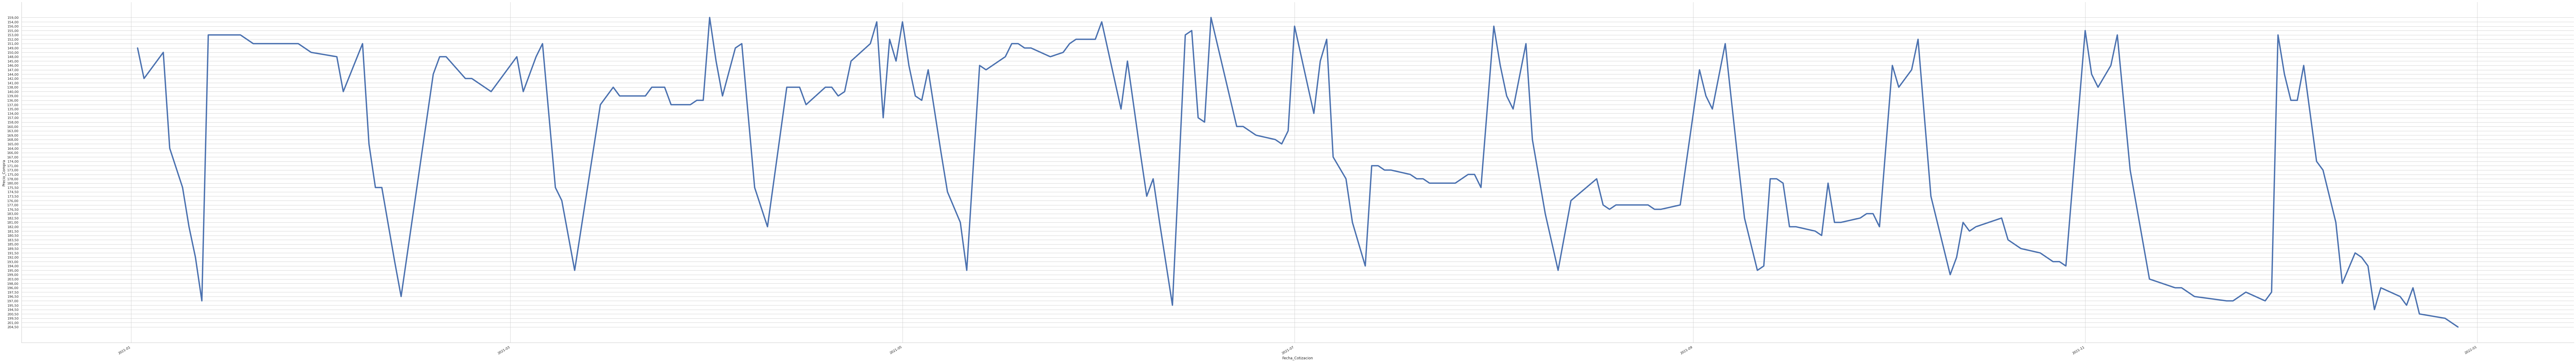

In [374]:
#df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
g = sns.relplot(x="Fecha_Cotizacion", y="Precio_Compra", kind="line", data=df,linewidth=4.5,palette="tab10", height=20, aspect=6)
g.figure.autofmt_xdate()

In [325]:
from bokeh.plotting import figure, output_file, show

In [326]:
x = df['Fecha_Cotizacion']
y = df['Precio_Venta']

output_file('index.html')

p = figure(title='simple example',x_axis_label='X Axis',y_axis_label = 'Y Axis')

p.line(x,y,line_width=2)

show(p)

---
# **5.HACER REQUEST DESDE LA PAGINA ORIGEN, DE DONDE SACA LA INFO LA WEB SCRAPEADA?**
**objetivo: independencia de la web scrapeada y actualizar automaticamente de forma constante de acuerdo a las nuevas cotizaciones**
